**Almas Fathin Irbah**
> Dataset : "Sunspots - Monthly Mean Total Sunspot Number - from jan 1749 to jan 2021" \
> Sumber : Kaggle \
> Link Dataset : https://www.kaggle.com/robervalt/sunspots

***Preparation***

In [172]:
from google.colab import files
files.upload()

Saving Sunspots.csv to Sunspots (2).csv


{'Sunspots.csv': b',Date,Monthly Mean Total Sunspot Number\r\n0,1749-01-31,96.7\r\n1,1749-02-28,104.3\r\n2,1749-03-31,116.7\r\n3,1749-04-30,92.8\r\n4,1749-05-31,141.7\r\n5,1749-06-30,139.2\r\n6,1749-07-31,158.0\r\n7,1749-08-31,110.5\r\n8,1749-09-30,126.5\r\n9,1749-10-31,125.8\r\n10,1749-11-30,264.3\r\n11,1749-12-31,142.0\r\n12,1750-01-31,122.2\r\n13,1750-02-28,126.5\r\n14,1750-03-31,148.7\r\n15,1750-04-30,147.2\r\n16,1750-05-31,150.0\r\n17,1750-06-30,166.7\r\n18,1750-07-31,142.3\r\n19,1750-08-31,171.7\r\n20,1750-09-30,152.0\r\n21,1750-10-31,109.5\r\n22,1750-11-30,105.5\r\n23,1750-12-31,125.7\r\n24,1751-01-31,116.7\r\n25,1751-02-28,72.5\r\n26,1751-03-31,75.5\r\n27,1751-04-30,94.0\r\n28,1751-05-31,101.2\r\n29,1751-06-30,84.5\r\n30,1751-07-31,110.5\r\n31,1751-08-31,99.7\r\n32,1751-09-30,39.2\r\n33,1751-10-31,38.7\r\n34,1751-11-30,47.5\r\n35,1751-12-31,73.3\r\n36,1752-01-31,58.3\r\n37,1752-02-29,83.3\r\n38,1752-03-31,118.3\r\n39,1752-04-30,98.8\r\n40,1752-05-31,99.5\r\n41,1752-06-30,66.0\r

In [173]:
# u/ dataframe
import pandas as pd
import numpy as np

In [174]:
# u/ split data
from sklearn.model_selection import train_test_split

In [175]:
# u/ preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

In [176]:
# u/ visualisasi plot
import matplotlib.pyplot as plt

***Read Dataset*** 

In [177]:
df = pd.read_csv('Sunspots.csv')
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


***Checking Dataset***

In [178]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')


In [179]:
print(df.shape)

(3265, 3)


***Dropping unnessesary column***

In [180]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(df)

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


***Loading date for 1749 - 2021***

In [181]:
df['Date'] = pd.to_datetime(df['Date'])  
get_data = (df['Date'] > '1749-01-31') & (df['Date'] <= '2021-01-31')
df.loc[get_data]

,Date,Monthly Mean Total Sunspot Number
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


In [182]:
df = df.loc[get_data]
display(df)

,Date,Monthly Mean Total Sunspot Number
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


***Checking the missing values***

In [183]:
df.isnull().sum()

Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

***Plotting each column***

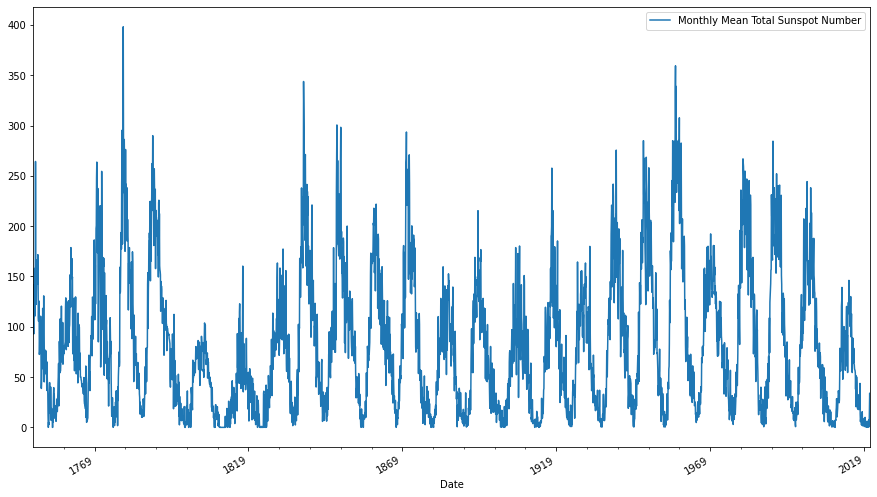

In [184]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(x='Date', y='Monthly Mean Total Sunspot Number', subplots=True, figsize=(15, 9))
plt.show()

In [185]:
dates = df['Date'].values
sunspots = df['Monthly Mean Total Sunspot Number'].values

In [186]:
dates = np.array(dates)
sunspots = np.array(sunspots)

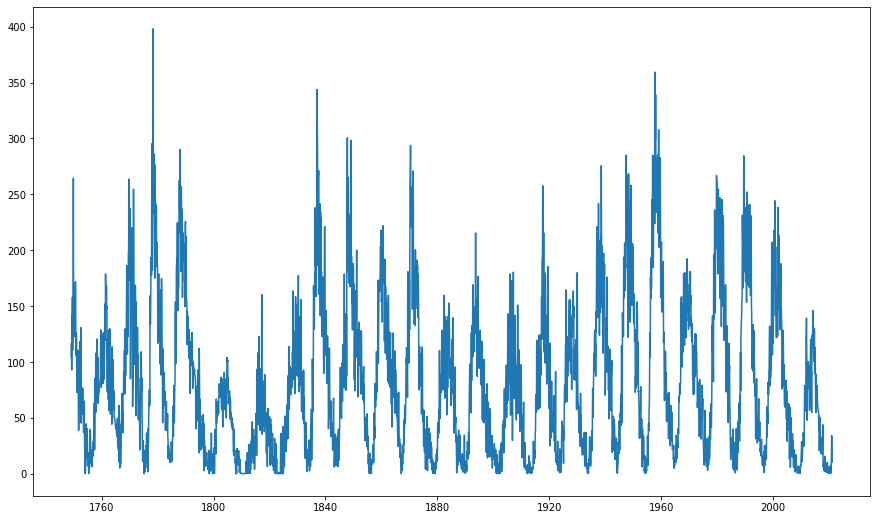

In [187]:
plt.figure(figsize=(15,9))
plt.plot(dates, sunspots)

Text(0.5, 0, 'Datetime')

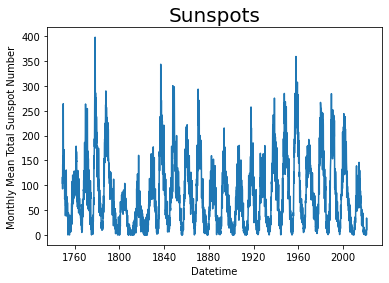

In [188]:
plt.plot(dates, sunspots)
plt.title('Sunspots', fontsize = 20)
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.xlabel('Datetime')

In [189]:
df.dtypes

Date                                 datetime64[ns]
Monthly Mean Total Sunspot Number           float64
dtype: object

***Split Dataset***

In [190]:
x_train, x_valid, y_train, y_valid = train_test_split(sunspots, dates, train_size=0.8, test_size = 0.2, shuffle = False )

***Train data total (80%) and validation (20%)***

In [191]:
print('Total Data Train : ',len(x_train))
print('Total Data Validation : ',len(x_valid))

Total Data Train :  2611
Total Data Validation :  653


In [192]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

***Modelling Squential***

In [193]:
tf.keras.backend.set_floatx('float64')

In [194]:
train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

In [195]:
model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

***Counting 10% MAE value for callback***

In [196]:
Mae = (df['Monthly Mean Total Sunspot Number'].max() - df['Monthly Mean Total Sunspot Number'].min()) * 10/100
print(Mae)

39.82


***Using Callback <10%***

In [201]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<39.82 and logs.get('val_mae')<39.82):
      print("\nMAE from model < 10% Data Scale")
      self.model.stop_training = True
callbacks = myCallback()

***Using Learning rate SGD for optimizer***

In [202]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [203]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [204]:
history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100
13/13 [==============================] - 21s 1s/step - loss: 24.0611 - mae: 24.5547 - val_loss: 23.2662 - val_mae: 23.7589

MAE from model < 10% Data Scale


***Plotting ccuraccy and loss***

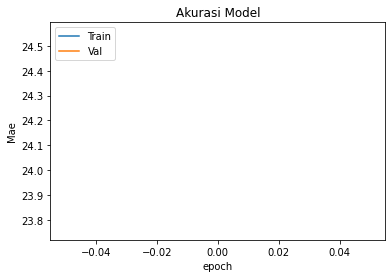

In [205]:
# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

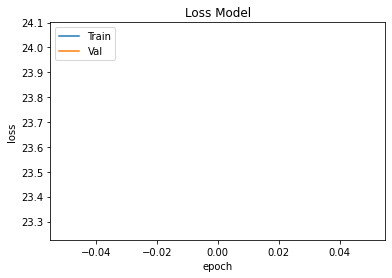

In [206]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()